**Section 1 : Handling Missing Data**

**Exercise 1.1 Identifying Missing values**

In [51]:
import pandas as pd
from io import StringIO

csv_data = '''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,
5.0,6.0,,8.0'''
df = pd.read_csv(StringIO(csv_data))
print(df)
print(df.isnull().sum())

      A     B     C    D
0   1.0   2.0   3.0  4.0
1   5.0   6.0   NaN  8.0
2  10.0  11.0  12.0  NaN
3   5.0   6.0   NaN  8.0
A    0
B    0
C    2
D    1
dtype: int64


The missing values in each column are as follows:

* A = 0
* B = 0
* C = 1
* D = 1

after modifying the code they became like this

* A = 0
* B = 0
* C = 2
* D = 1

**Exercize 1.2: Eliminating Missing Values**

In [52]:
# Drop rows with any missing values
print(df.dropna(axis=0))

# Drop columns with any missing values
print(df.dropna(axis=1))

# Drop rows where all values are missing (none in this case)
print(df.dropna(how='all'))

# Drop rows with fewer than 4 non-missing values
print(df.dropna(thresh=4))

# Drop rows where 'C' is missing
print(df.dropna(subset=['C']))

     A    B    C    D
0  1.0  2.0  3.0  4.0
      A     B
0   1.0   2.0
1   5.0   6.0
2  10.0  11.0
3   5.0   6.0
      A     B     C    D
0   1.0   2.0   3.0  4.0
1   5.0   6.0   NaN  8.0
2  10.0  11.0  12.0  NaN
3   5.0   6.0   NaN  8.0
     A    B    C    D
0  1.0  2.0  3.0  4.0
      A     B     C    D
0   1.0   2.0   3.0  4.0
2  10.0  11.0  12.0  NaN


**Dropping rows (axis=0)**

we would prefer dropping the rows when the few rows have missing values, but most of the dataset is complete. Lets say we have 1000 samples and only 5 samples of the dataset have missing values. the effect wont be too much so its cheapter to drop them

**Dropping Columns (axis=1)**
We would drop the column if the columns has many missing values like maybe above 60% of the data is empty then that means the column is not useful for analysis and another situation where we would choose to dropping the column is when the column is not really affecting or analysis.

**Exercise 1.3: Imputing Missing Values**

In [53]:
from sklearn.impute import SimpleImputer
import numpy as np

imr = SimpleImputer(missing_values=np.nan, strategy='mean')
imr = imr.fit(df.values)
imputed_data = imr.transform(df.values)
print(imputed_data)

[[ 1.          2.          3.          4.        ]
 [ 5.          6.          7.5         8.        ]
 [10.         11.         12.          6.66666667]
 [ 5.          6.          7.5         8.        ]]


In [54]:
from sklearn.impute import SimpleImputer
import numpy as np

imr = SimpleImputer(missing_values=np.nan, strategy='median')
imr = imr.fit(df.values)
imputed_data = imr.transform(df.values)
print(imputed_data)

[[ 1.   2.   3.   4. ]
 [ 5.   6.   7.5  8. ]
 [10.  11.  12.   8. ]
 [ 5.   6.   7.5  8. ]]


In [55]:
from sklearn.impute import SimpleImputer
import numpy as np

imr = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imr = imr.fit(df.values)
imputed_data = imr.transform(df.values)
print(imputed_data)

[[ 1.  2.  3.  4.]
 [ 5.  6.  3.  8.]
 [10. 11. 12.  8.]
 [ 5.  6.  3.  8.]]


When we compare them we can see they differ alot depending on the strategy used.

And the Reason why 'most_frequent' might be useful when dealing with categorical data its because categorical features are like (gender, city, department) they are not numerical so they dont have numerical meean or median so we cant use the mean and the median. so by using the most_frequent it keeps the distribution of the categorical variable closer to the original dataset. That is also because the mode or most_frequent is the most likely "guess" for a missing category.

# **Section 2: Handling Categorical Data**

**Exercise 2.1: Mapping Ordinal Features**

In [56]:
df = pd.DataFrame([
    ['green', 'M', 10.1, 'class2'],
    ['red', 'L', 13.5, 'class1'],
    ['blue', 'XL', 15.3, 'class2']])
df.columns = ['color', 'size', 'price', 'classlabel']

size_mapping = {'XL': 3, 'L': 2, 'M': 1}
df['size'] = df['size'].map(size_mapping)
print(df)

# Inverse mapping
inv_size_mapping = {v: k for k, v in size_mapping.items()}
print(df['size'].map(inv_size_mapping))

   color  size  price classlabel
0  green     1   10.1     class2
1    red     2   13.5     class1
2   blue     3   15.3     class2
0     M
1     L
2    XL
Name: size, dtype: object


In [57]:
#now defining the one with the more sizes
df = pd.DataFrame([
    ['Orange', 'S', 8.2, 'class1'],
    ['green', 'M', 10.1, 'class2'],
    ['red', 'L', 13.5, 'class1'],
    ['blue', 'XL', 15.3, 'class2']])
df.columns = ['color', 'size', 'price', 'classlabel']

size_mapping = {'XL': 3, 'L': 2, 'M': 1, 'S': 0}
df['size'] = df['size'].map(size_mapping)
print(df)

# Inverse mapping
inv_size_mapping = {v: k for k, v in size_mapping.items()}
print(df['size'].map(inv_size_mapping))

    color  size  price classlabel
0  Orange     0    8.2     class1
1   green     1   10.1     class2
2     red     2   13.5     class1
3    blue     3   15.3     class2
0     S
1     M
2     L
3    XL
Name: size, dtype: object


**Exercise 2.2: Encoding Class Labels**

In [58]:
#Lets start by trying without encoding and see. you can uncomment the below code
"""
from sklearn.linear_model import LogisticRegression

X = df[['color', 'size', 'price']]  # color is string
y = df['classlabel']

clf = LogisticRegression()
clf.fit(X, y)
"""


"\nfrom sklearn.linear_model import LogisticRegression\n\nX = df[['color', 'size', 'price']]  # color is string\ny = df['classlabel']\n\nclf = LogisticRegression()\nclf.fit(X, y)\n"

You can see its not working because the dataset is not encoded so now we can continue with our dataset

Most ML algorithms in sklearn like e.g. Logistic Regression expect numeric input, not strings. So if we have labels as strings "class1", "class2", the classifier wont know how to compare or compute with them. So encoding like class1 -> 0, class2 -> 1 gives the algorithm a numerical representation it can work with. Its important especially for the target labels (y) since the classifier experts them as numbers

In [59]:
from sklearn.preprocessing import LabelEncoder

class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'].values)
print(y)

# Inverse
print(class_le.inverse_transform(y))

[0 1 0 1]
['class1' 'class2' 'class1' 'class2']


In [60]:
X = df[['color', 'size', 'price']].values
color_le = LabelEncoder()
X[:, 0] = color_le.fit_transform(X[:, 0])
print(X)

# One-hot encoding
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
print(ohe.fit_transform(X[:, [0]]).toarray())  # Only on 'color'

# Using pandas get_dummies
print(pd.get_dummies(df[['price', 'color', 'size']]))

# Drop first column to avoid multicollinearity
print(pd.get_dummies(df[['price', 'color', 'size']], drop_first=True))

[[0 0 8.2]
 [2 1 10.1]
 [3 2 13.5]
 [1 3 15.3]]
[[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]]
   price  size  color_Orange  color_blue  color_green  color_red
0    8.2     0          True       False        False      False
1   10.1     1         False       False         True      False
2   13.5     2         False       False        False       True
3   15.3     3         False        True        False      False
   price  size  color_blue  color_green  color_red
0    8.2     0       False        False      False
1   10.1     1       False         True      False
2   13.5     2       False        False       True
3   15.3     3        True        False      False


so now to appply one-hot encoding to the full dataset this is what we can do

In [61]:
df_encoded = pd.get_dummies(df, columns=['color', 'size'], drop_first=True)

# Display the fully encoded DataFrame
print("One-hot encoded DataFrame (first column per category dropped to avoid multicollinearity):")
print(df_encoded)

One-hot encoded DataFrame (first column per category dropped to avoid multicollinearity):
   price classlabel  color_blue  color_green  color_red  size_1  size_2  \
0    8.2     class1       False        False      False   False   False   
1   10.1     class2       False         True      False    True   False   
2   13.5     class1       False        False       True   False    True   
3   15.3     class2        True        False      False   False   False   

   size_3  
0   False  
1   False  
2   False  
3    True  


Multicollinearity occurs when dummy columns are linearly dependent. Dropping one column per categorical variable avoids this by providing a reference category, making linear models stable

# **Section 3: Partitioning a Dataset**

In [62]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
                   'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
print(df_wine.head())

from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)
print('Train shape:', X_train.shape, 'Test shape:', X_test.shape)

   Class label  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0            1    14.23        1.71  2.43               15.6        127   
1            1    13.20        1.78  2.14               11.2        100   
2            1    13.16        2.36  2.67               18.6        101   
3            1    14.37        1.95  2.50               16.8        113   
4            1    13.24        2.59  2.87               21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0             5.64  1.04                          3.92  

In [63]:
print(pd.Series(y_train).value_counts(normalize=True))
print(pd.Series(y_test).value_counts(normalize=True))

2    0.403226
1    0.330645
3    0.266129
Name: proportion, dtype: float64
2    0.388889
1    0.333333
3    0.277778
Name: proportion, dtype: float64


In [64]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
                   'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
print(df_wine.head())

from sklearn.model_selection import train_test_split

#Now chaning to 0.2 as instructed on the test size
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
print('Train shape:', X_train.shape, 'Test shape:', X_test.shape)

   Class label  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0            1    14.23        1.71  2.43               15.6        127   
1            1    13.20        1.78  2.14               11.2        100   
2            1    13.16        2.36  2.67               18.6        101   
3            1    14.37        1.95  2.50               16.8        113   
4            1    13.24        2.59  2.87               21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0             5.64  1.04                          3.92  

In [65]:
print(pd.Series(y_train).value_counts(normalize=True))
print(pd.Series(y_test).value_counts(normalize=True))

2    0.401408
1    0.330986
3    0.267606
Name: proportion, dtype: float64
2    0.388889
1    0.333333
3    0.277778
Name: proportion, dtype: float64


if we look above the propotions when the test size was still at 0.2 and also when they were at 0.3 we can see the difference

The reason why we usually use stratify=y is to ensure that the train and test sets preserve the same class distribution as the original dataset
so if we dont use it random splitting could give an uneven number of samples per class in train or test

# **Section 4: Feature Scaling**

**Exercise 4.1: Normalization (Min-Max Scaling)**

In [66]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)
print(X_train_norm[:2])  # First two rows

[[0.12573099 0.02964427 0.65240642 0.3814433  0.2962963  0.42068966
  0.39451477 0.16981132 0.61075949 0.11634103 0.32978723 0.66300366
  0.17261056]
 [0.79239766 0.14624506 0.51336898 0.31958763 0.30864198 0.42068966
  0.44092827 0.24528302 0.36392405 0.28952043 0.73404255 0.56776557
  0.7146933 ]]


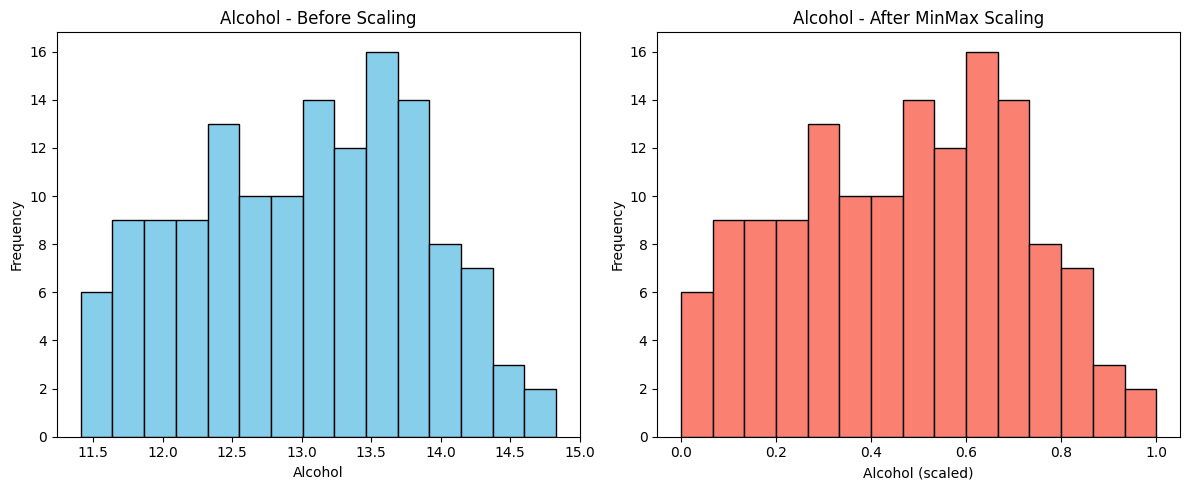

In [67]:
import matplotlib.pyplot as plt

# We will use alcohol here to plot our thing
feature_idx = 0  # 0 = Alcohol

plt.figure(figsize=(12,5))

# Histogram before scaling
plt.subplot(1, 2, 1)
plt.hist(X_train[:, feature_idx], bins=15, color='skyblue', edgecolor='black')
plt.title('Alcohol - Before Scaling')
plt.xlabel('Alcohol')
plt.ylabel('Frequency')

# Histogram after MinMax scaling
plt.subplot(1, 2, 2)
plt.hist(X_train_norm[:, feature_idx], bins=15, color='salmon', edgecolor='black')
plt.title('Alcohol - After MinMax Scaling')
plt.xlabel('Alcohol (scaled)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


**Exercise 4.2: Standardization**

In [68]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)
print(X_train_std[:2])

[[-1.45083563 -1.27985582  0.74306024 -0.49136511 -0.37078043 -0.15558334
   0.17965734 -1.20822065  1.29150989 -0.84486398 -0.74910758  0.66674895
  -0.71247369]
 [ 1.34746381 -0.75756493 -0.2118226  -0.84257574 -0.29683265 -0.15558334
   0.39838279 -0.87620839 -0.0490171  -0.00656951  0.99652401  0.29506888
   1.63245344]]


In [69]:
# Compute mean and std of the standardized training set
means = X_train_std.mean(axis=0)
stds = X_train_std.std(axis=0)

for i, (mean, std) in enumerate(zip(means, stds)):
    print(f"Feature {i}: mean={mean:.3f}, std={std:.3f}")

Feature 0: mean=-0.000, std=1.000
Feature 1: mean=-0.000, std=1.000
Feature 2: mean=-0.000, std=1.000
Feature 3: mean=0.000, std=1.000
Feature 4: mean=-0.000, std=1.000
Feature 5: mean=-0.000, std=1.000
Feature 6: mean=0.000, std=1.000
Feature 7: mean=-0.000, std=1.000
Feature 8: mean=-0.000, std=1.000
Feature 9: mean=0.000, std=1.000
Feature 10: mean=0.000, std=1.000
Feature 11: mean=0.000, std=1.000
Feature 12: mean=0.000, std=1.000


We use standardization when features have different scales and algorithms assume centered data, use normalization when you want values in a specific range like [0,1]

# **Section 5: Selecting Meaningful Features**

**Exercise 5.1: L1 Regularization for Sparsity**

In [70]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l1', C=1.0, solver='liblinear', multi_class='ovr')
lr.fit(X_train_std, y_train)
print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))
print(lr.coef_)

Training accuracy: 1.0
Test accuracy: 1.0
[[ 1.28488906  0.17339299  0.76440221 -1.26192638  0.          0.
   1.21597475  0.          0.          0.          0.          0.6030378
   2.59600478]
 [-1.52880082 -0.48652934 -1.09029151  0.58317036  0.          0.
   0.5699273   0.07353612  0.08577566 -2.12296029  1.00520989  0.
  -2.32011946]
 [ 0.16125371  0.14041521  0.54363859  0.          0.          0.
  -2.4394867   0.          0.          1.80337871 -1.06475436 -0.46695063
   0.        ]]


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [72]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l1', C=10, solver='liblinear', multi_class='ovr')
lr.fit(X_train_std, y_train)
print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))
print(lr.coef_)

Training accuracy: 1.0
Test accuracy: 1.0
[[ 2.79561702  0.98657134  2.04341786 -3.28763346  0.33629692  0.
   2.02616476  0.          0.          0.          0.          1.97402874
   4.19288567]
 [-2.55220356 -1.53197711 -2.821388    1.88227559  0.          0.
   1.58506564  1.24784276  0.34779141 -7.08883437  1.86592172  0.
  -6.19107649]
 [ 2.02838916  0.03396219  1.48370521  0.          0.          0.
  -5.05737165 -0.59809378  0.          3.25469175 -2.17053388 -1.44680778
   0.        ]]


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


We can see the accuracy even decreases after reducin the c to 0.1 but in 1 and 10 it stays the same

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was depre

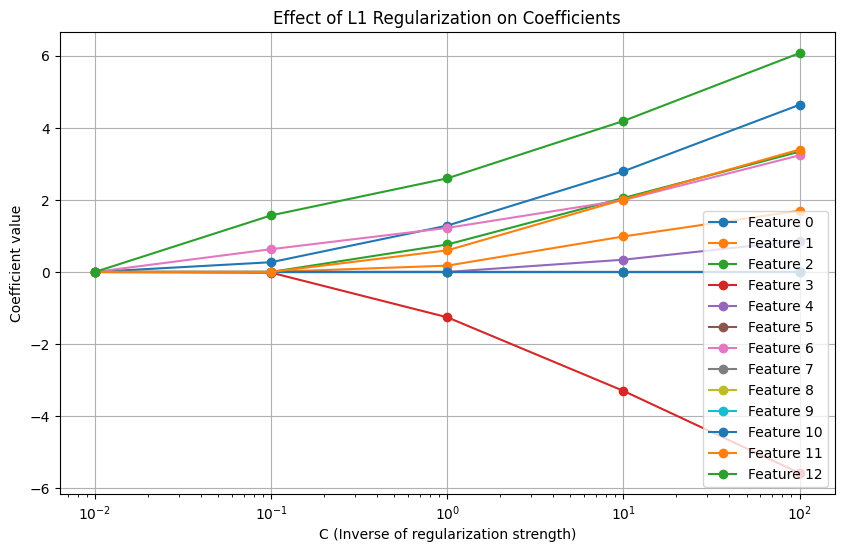

In [74]:
#but for seeing it happening properly we can do this way
# Use L1 penalty and OVR for multiclass
Cs = [0.01, 0.1, 1, 10, 100]  # try multiple C values
coefs = []

for C in Cs:
    lr = LogisticRegression(penalty='l1', C=C, solver='liblinear', multi_class='ovr')
    lr.fit(X_train_std, y_train)
    coefs.append(lr.coef_[0])  # take the coefficients for the first class

coefs = np.array(coefs)

# Plot coefficients vs. C
plt.figure(figsize=(10,6))
for i in range(coefs.shape[1]):
    plt.plot(Cs, coefs[:, i], marker='o', label=f'Feature {i}')
plt.xscale('log')
plt.xlabel('C (Inverse of regularization strength)')
plt.ylabel('Coefficient value')
plt.title('Effect of L1 Regularization on Coefficients')
plt.legend()
plt.grid(True)
plt.show()


**Exercise 5.2: Sequential Backward Selection (SBS)**

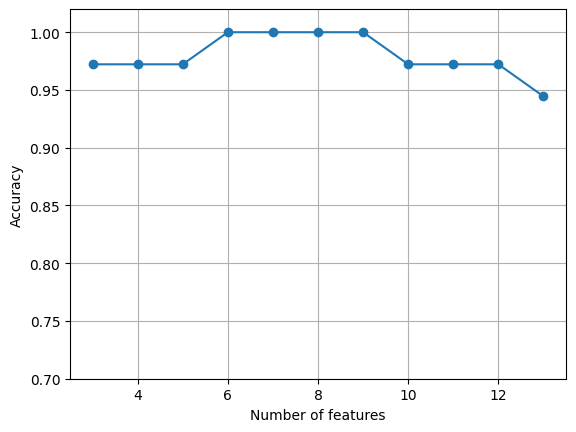

Index(['Alcohol', 'Flavanoids', 'Proanthocyanins'], dtype='object')
Test accuracy: 0.9166666666666666


In [81]:
# Paste SBS class here
from sklearn.base import BaseEstimator, clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score

class SBS(BaseEstimator):
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
                             random_state=self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train,
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train,
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best_score = max(scores)
            best_idx = np.argmax(scores)
            self.indices_ = subsets[best_idx]
            self.subsets_.append(self.indices_)
            self.scores_.append(best_score)
            dim -= 1

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score


from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # Import train_test_split

knn = KNeighborsClassifier(n_neighbors=5)
sbs = SBS(knn, k_features=3)
sbs.fit(X_train_std, y_train)

k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.show()

# Selected features
k3 = list(sbs.subsets_[10])
print(df_wine.columns[1:][k3])

# Performance with selected
knn.fit(X_train_std[:, k3], y_train)
print('Test accuracy:', knn.score(X_test_std[:, k3], y_test))

the more we take the number of k_features is the more the accuracy starts high as compared to when we are just using the 1 which starts from the low accuracy. this is taken from the plot

**Exercise 5.3: Feature Importance with Random Forests**

 1) Proline                        0.188217
 2) Flavanoids                     0.151884
 3) Color intensity                0.150182
 4) Alcohol                        0.137097
 5) OD280/OD315 of diluted wines   0.126218
 6) Hue                            0.062428
 7) Total phenols                  0.051911
 8) Malic acid                     0.031839
 9) Magnesium                      0.028725
10) Alcalinity of ash              0.025410
11) Proanthocyanins                0.018676
12) Ash                            0.014667
13) Nonflavanoid phenols           0.012745


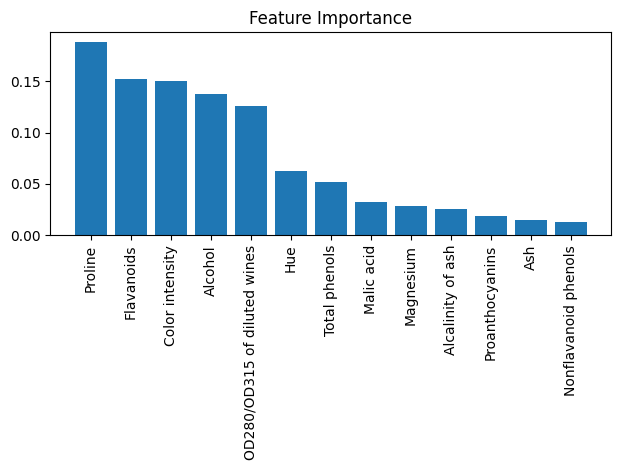

In [82]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = df_wine.columns[1:]
forest = RandomForestClassifier(n_estimators=500, random_state=1)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

we are using the SelectFromModel with threashold = 0.1 on those selected features and then compare top features from RF and SBS

In [83]:
# --- NEW CELL: SelectFromModel + comparison with SBS ---
from sklearn.feature_selection import SelectFromModel

# Select features with importance >= 0.1
sfm = SelectFromModel(forest, threshold=0.1, prefit=True)
X_train_sfm = sfm.transform(X_train)
X_test_sfm = sfm.transform(X_test)

# Print selected features
selected_idx = sfm.get_support(indices=True)
selected_feat_labels = feat_labels[selected_idx]
print("Selected features (importance >= 0.1):", selected_feat_labels.tolist())

# Train the same RF on selected features
forest_sfm = RandomForestClassifier(n_estimators=500, random_state=1)
forest_sfm.fit(X_train_sfm, y_train)
print("Test accuracy on selected features:", forest_sfm.score(X_test_sfm, y_test))

# Compare top SBS features
print("Top SBS features:", df_wine.columns[1:][k3].tolist())

Selected features (importance >= 0.1): ['Alcohol', 'Flavanoids', 'Color intensity', 'OD280/OD315 of diluted wines', 'Proline']
Test accuracy on selected features: 0.9722222222222222
Top SBS features: ['Alcohol', 'Flavanoids', 'Proanthocyanins']


# **Conclusion**

I learnt how preprocessing: handlng missing data, encoding categorical features, and scaling numerical features affects model performance, Proper encoding and scaling help algorihms converge faster and make feaures comparable. Feature selection methods like SBS and RandomForest importance identify the most relevant features. Stratified train/test splitting preserves class proportions. Overall, good preprocessing imporoves accuracy, stability, and interpretability of models.

**Answers to questions**
1. Handling missing data is important because most machine learning algorithms cannot work with missing vales, Leave missing data can lead t Errors or crashed during the modl training, Biased or inaccurate model, loss of information if not handled properly. All this because of some missing data.
2. Label Encoding: Use when the categorical feature is ordinal(has a natual ordr e.g. like S < M )
and use One-Hot encoding when the categorical feature is norminal or w
3. Feature scaling ensures that all ensurs that all features contrbute equally to the distance or margin calculatoinis
LMM Uses distance between poits, without scaling features wth larger ranges may contribute more
SVM optimization depends on feature magnitudes, Unscaeld features an slow convergence and lead to suboptimal hyperplaces.
4. L1 is automatic and integrested in trainng while SBS is a wrapper method that explkc